<a href="https://colab.research.google.com/github/Pambao/MIP/blob/main/Problem_Set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1:
Consider the geometric transformation given by <br> 
$x’ = x cos\theta + y sin\theta$ <br>
$y’= -x sin\theta + y cos\theta$ <br>
Apply this transform to the chest image (figure_problem_set_2, 256 x 256 pixels, 2 bytes per
pixel) by developing algorithms that perform <br>
(a) nearest neighbor interpolation and <br>
(b) linear interpolation. Comment on differences between the appearances of the transformed images.

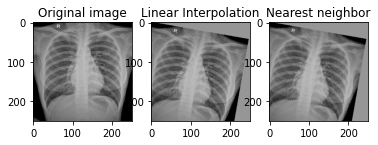

In [13]:
import math

import matplotlib.pyplot as plt
from PIL import Image

def solution2_1():
    angle = math.radians(10)
    # Load and setup image from memory
    image = Image.open('drive/MyDrive/MIP Resource/Chest_HoanMy_96.jpg')
    image = image.convert('L')
    image = image.resize((250, 250))
    size = image.size

    # Nearest neighbor interpolation image
    nearestNeighbor = Image.new('L', size=(250, 250), color=150)
    # Linear interpolation image
    linear = Image.new('L', size=(250, 250), color=150)

    for y in range(size[1]):
        for x in range(size[0]):
            newX = x * math.cos(angle) + y * math.sin(angle)
            newY = -x * math.sin(angle) + y * math.cos(angle)

            roundX = int(newX)
            roundY = int(newY)

            # Construct nearest neighbor interpolation image
            if 0 <= roundX < size[0] and 0 <= roundY < size[1]:
                linear.putpixel((x, y), image.getpixel((roundX, roundY)))

            # Construct linear interpolation image
            l = int(newX)
            k = int(newY)
            a = newX - l
            b = newY - k

            if 0 <= l < size[0] - 1 and 0 <= k < size[1] - 1:
                val = (a * b * image.getpixel((l, k))
                       + (1 - a) * b * image.getpixel((l + 1, k))
                       + (1 - b) * a * image.getpixel((l, k + 1))
                       + (1 - a) * (1 - b) * image.getpixel((l + 1, k + 1)))

                nearestNeighbor.putpixel((x, y), int(val))

    plt.subplot(1,3,1)
    plt.title('Original image')
    plt.imshow(image, cmap='gray', vmin = 0, vmax = 255)
    
    plt.subplot(1,3,2)
    plt.title('Linear Interpolation')
    plt.imshow(linear, cmap='gray', vmin = 0, vmax = 255)
    
    plt.subplot(1,3,3)
    plt.title('Nearest neighbor')
    plt.imshow(nearestNeighbor, cmap='gray', vmin = 0, vmax = 255)
    
    plt.show()

solution2_1()

The appearance for image using Nearest Neighbor Interpolation transformation is smoother
than the one using Linear Interpolation since the Linear Interpolation method take the
average between "new-value" and "int(newValue)" of the gray-scale image, which is not very
large. Additionally, the method "putPixel" can only accept integer value, which probably
makes the pixels in the same region has the same value that make the transformed picture blurred.

## Question 2:
Develop an algorithm to construct a "gradient-direction image" based on the Sobel operator. Apply this algorithm to the chest image and comment on the output image. (Hint: Compute the gradient direction and "encode" the result using a direction template consisting of 8 directions.
The resulting image will be "octary" (i.e., it will contain only 8 gray levels).

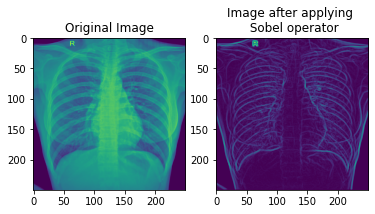

In [20]:
def solution2_2():
    image = Image.open('drive/MyDrive/MIP Resource/Chest_HoanMy_96.jpg')
    image = image.convert('L')
    image = image.resize((250, 250))
    size = image.size
    edge_image = Image.new('L', size, 0)
    sobel_filter_X = [-1, 0, 1, -2, 0, 2, -1, 0, 1]
    sobel_filter_Y = (1, 2, 1, 0, 0, 0, -1, -2, -1)
    for y in range(size[1])[1: -1]:
        for x in range(size[0])[1: -1]:
            valX = 0
            valY = 0
            current_index = 0
            for j in range(y - 1, y + 2):
                for i in range(x - 1, x + 2):
                    val = image.getpixel((i, j))
                    valX += val * sobel_filter_X[current_index]
                    valY += val * sobel_filter_Y[current_index]
                    current_index += 1
            gradient = math.sqrt(math.pow(valX, 2) + math.pow(valY, 2))
            gradient = int(gradient * 255 / 1442)
            edge_image.putpixel((x, y), gradient)

    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1,2,2)
    plt.imshow(edge_image)
    plt.title('Image after applying \n Sobel operator')
    plt.show()

solution2_2()

The image after applying the gradient using both horizontal and vertical sobel kernel highlights the edges
of the image. Since the value of the pixel at the position X after applying the kernel is based on the 
difference of position (X - 1) and (X + 1), the more it varies the higher the result is, and vice versa. 
Hence, the pixels of the region with the generally the same value has lower values (darker).